In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Fashion-MNIST dataset
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
mnist_train = mnist_train / 255.0
mnist_test = mnist_test / 255.0

# Pad the images to 32x32
mnist_train = np.pad(mnist_train, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
mnist_test = np.pad(mnist_test, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)

# Check the shape of the data
print("Training data shape:", mnist_train.shape)
print("Test data shape:", mnist_test.shape)


Training data shape: (60000, 32, 32)
Test data shape: (10000, 32, 32)


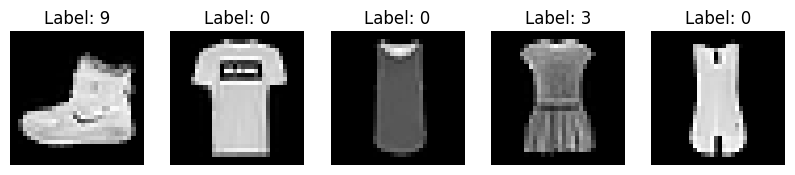

In [ ]:
import matplotlib.pyplot as plt

# Visualize 5 examples from the dataset
plt.figure(figsize=(10, 2))  # Adjust the figure size accordingly
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist_train[i], cmap='gray')
    plt.title(f"Label: {mnist_train_labels[i]}")
    plt.axis('off')

plt.show()

In [ ]:
# Define the input shape
input_shape = (32, 32, 1)

# Build the Encoder
encoder_input = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
print("Conv2D-1 output shape:", x.shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print("MaxPooling2D-1 output shape:", x.shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
print("Conv2D-2 output shape:", x.shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print("MaxPooling2D-2 output shape:", x.shape)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
print("Conv2D-3 output shape:", x.shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print("MaxPooling2D-3 output shape:", x.shape)
x = layers.Flatten()(x)
print("Flatten output shape:", x.shape)
bottleneck = layers.Dense(2, activation='relu')(x)
print("Bottleneck (Dense-1) output shape:", bottleneck.shape)

# Build the Decoder
x = layers.Dense(128 * 4 * 4, activation='relu')(bottleneck)  # Corresponding to the flatten size
print("Dense-2 output shape:", x.shape)
x = layers.Reshape((4, 4, 128))(x)  # Reshape into 3D tensor for Conv2D
print("Reshape output shape:", x.shape)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
print("Conv2D-4 output shape:", x.shape)
x = layers.UpSampling2D((2, 2))(x)
print("UpSampling2D-1 output shape:", x.shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
print("Conv2D-5 output shape:", x.shape)
x = layers.UpSampling2D((2, 2))(x)
print("UpSampling2D-2 output shape:", x.shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print("Conv2D-6 output shape:", x.shape)
x = layers.UpSampling2D((2, 2))(x)
print("UpSampling2D-3 output shape:", x.shape)
decoder_output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print("Final Conv2D output shape:", decoder_output.shape)

# Combine encoder and decoder into an autoencoder model (note the symmetric architecture)
autoencoder = models.Model(encoder_input, decoder_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Display the model summary
autoencoder.summary()


Conv2D-1 output shape: (None, 32, 32, 32)
MaxPooling2D-1 output shape: (None, 16, 16, 32)
Conv2D-2 output shape: (None, 16, 16, 64)
MaxPooling2D-2 output shape: (None, 8, 8, 64)
Conv2D-3 output shape: (None, 8, 8, 128)
MaxPooling2D-3 output shape: (None, 4, 4, 128)
Flatten output shape: (None, 2048)
Bottleneck (Dense-1) output shape: (None, 2)
Dense-2 output shape: (None, 2048)
Reshape output shape: (None, 4, 4, 128)
Conv2D-4 output shape: (None, 4, 4, 128)
UpSampling2D-1 output shape: (None, 8, 8, 128)
Conv2D-5 output shape: (None, 8, 8, 64)
UpSampling2D-2 output shape: (None, 16, 16, 64)
Conv2D-6 output shape: (None, 16, 16, 32)
UpSampling2D-3 output shape: (None, 32, 32, 32)
Final Conv2D output shape: (None, 32, 32, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,043 (1.31 MB)

 Trainable params: 343,043 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = autoencoder.fit(mnist_train, mnist_train,
                          epochs=10,
                          batch_size=128,
                          validation_data=(mnist_test, mnist_test),
                          shuffle=True               # Shuffle the data during training)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.3978 - val_loss: 0.2992
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2970 - val_loss: 0.2918
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2896 - val_loss: 0.2905
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2877 - val_loss: 0.2902
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2867 - val_loss: 0.2842
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2825 - val_loss: 0.2775
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2647 - val_loss: 0.2560
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2541 - val_loss: 0.2537
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2514 - val_loss: 0.2520
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2506 - val_loss: 0.2510


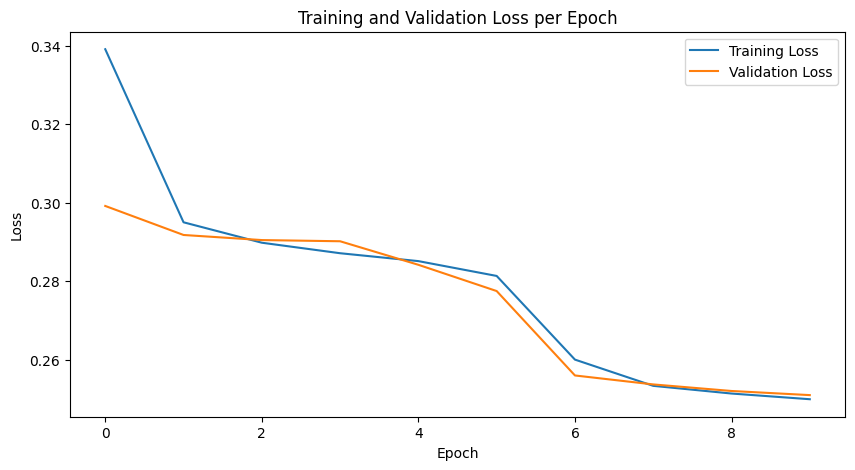

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


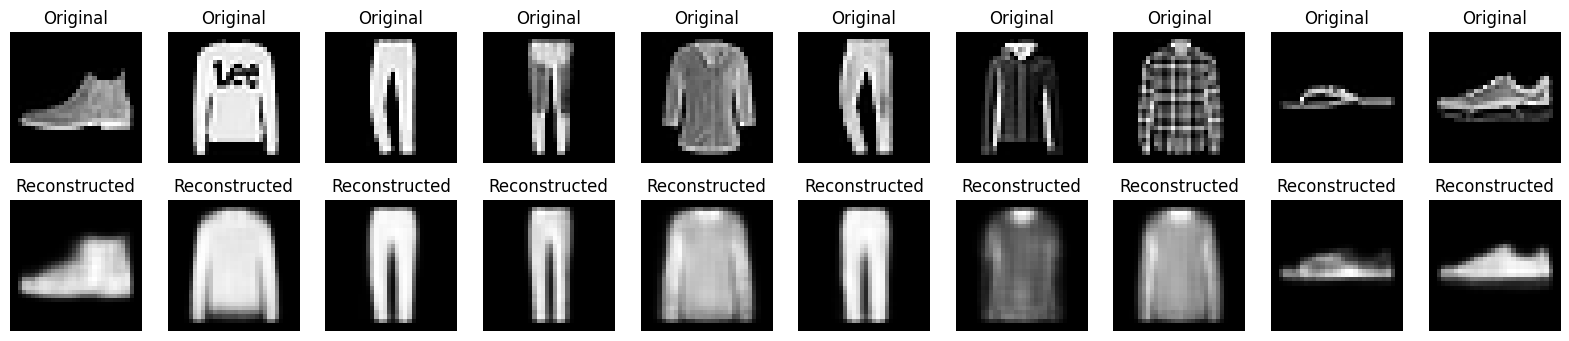

In [ ]:
# Plot training and validation loss per epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display several test images and their reconstructions
num_images = 10
test_images = mnist_test[:num_images]
reconstructed_images = autoencoder.predict(test_images)

plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Original images
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(32, 32), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(32, 32), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [ ]:
# Add Gaussian noise to the images
noise_factor = 0.2
mnist_train_noisy = mnist_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=mnist_train.shape)
mnist_test_noisy = mnist_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=mnist_test.shape)

# Clip the values to be between 0 and 1
mnist_train_noisy = np.clip(mnist_train_noisy, 0., 1.)
mnist_test_noisy = np.clip(mnist_test_noisy, 0., 1.)

In [ ]:
# Create a new noisy model using the same architecture
denoising_autoencoder = models.Model(encoder_input, decoder_output)

# Compile the new model for training on noisy data
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the new model on noisy data
history2 = denoising_autoencoder.fit(mnist_train_noisy, mnist_train,  # Noisy input, clean ground truth target
                                    epochs=10,
                                    batch_size=128,
                                    validation_data=(mnist_test_noisy, mnist_test),
                                    shuffle=True               # Shuffle the data during training)
                                    )


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2868 - val_loss: 0.2610
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2585 - val_loss: 0.2580
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2560 - val_loss: 0.2560
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2546 - val_loss: 0.2546
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2530 - val_loss: 0.2542
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2516 - val_loss: 0.2531
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2516 - val_loss: 0.2539
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2505 - val_loss: 0.2526
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2505 - val_loss: 0.2532
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2498 - val_loss: 0.2525


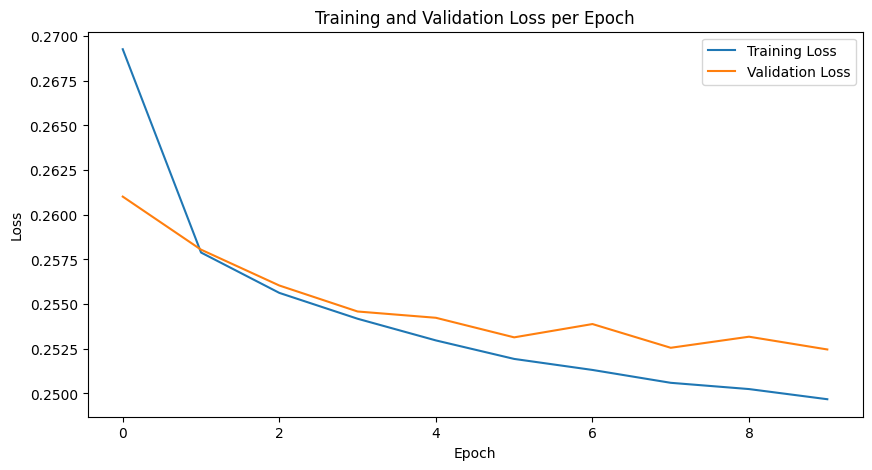

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


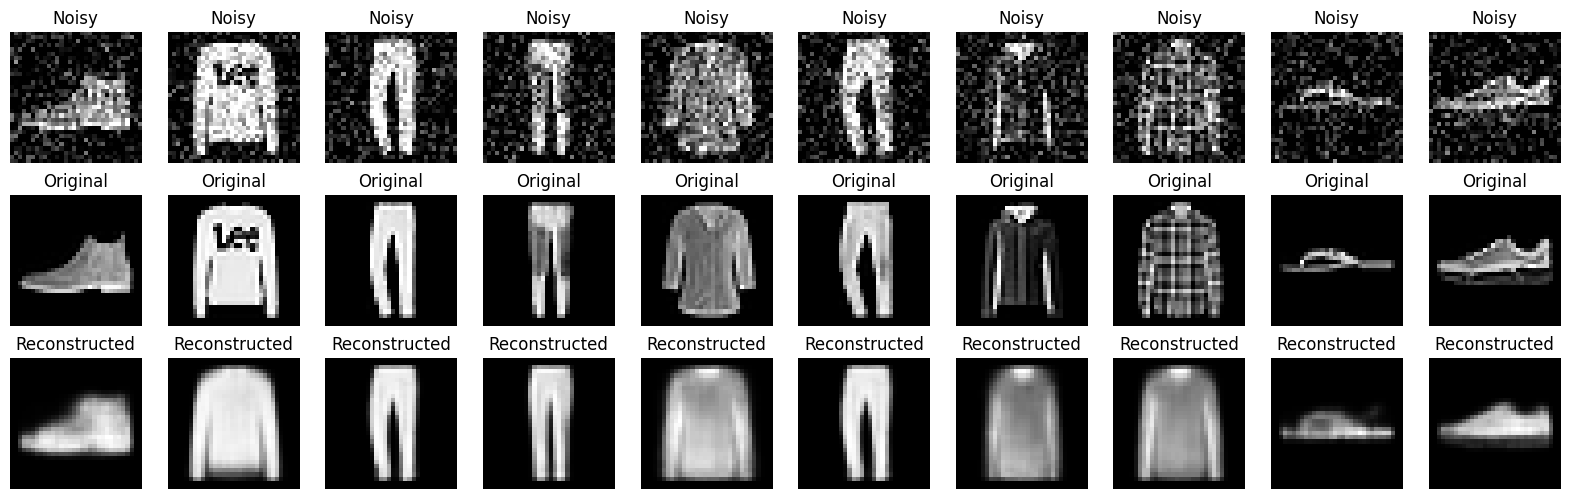

In [ ]:
# Plot training and validation loss per epoch
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display several test images and their reconstructions
num_images = 10
noisy_test_images = mnist_test_noisy[:num_images]
clean_test_images = mnist_test[:num_images]
reconstructed_images = denoising_autoencoder.predict(noisy_test_images)

plt.figure(figsize=(20, 6))
for i in range(num_images):
     # Original clean images
    ax = plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(clean_test_images[i].reshape(32, 32), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Noisy test images
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(noisy_test_images[i].reshape(32, 32), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(reconstructed_images[i].reshape(32, 32), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
